In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets.widgets.interaction import interact

 # Use interactive matplotlib backend, which runs in the browser
%matplotlib notebook

In [2]:
# Some data to visualize
data1 = np.random.random((256, 256, 256))
data2 = np.random.random((256, 256, 256))

In [3]:
def make_plot():
    global msg
    figsize = plt.figaspect(1/2)
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    # Draw an empty image
    img_view = ax[0].imshow(np.zeros((1,1)), cmap='jet')
    
    # Add a nice color bar
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    # Add an empty plot of the SH coefficients
    plot_view = ax[1].plot(np.zeros((1)))[0]
    #ax[1].set_aspect('scaled')
    #plt.axis('scaled')
    ax[1].set(adjustable="datalim")
    
    result = { 'img_view' : img_view,
               'img_ax' : ax[0],
               'plot_view' : plot_view,
               'plot_ax' : ax[1] }
    
    def on_click(event):
        global msg
        if event.inaxes is not ax[0] or 'on_click_handler' not in result:
            return
        result['on_click_handler'](np.uint32([event.ydata, event.xdata]))

    fig.canvas.mpl_connect('button_press_event', on_click)
    fig.tight_layout()

    return result

def plot_interact(plot):
    def redraw(slice_index, dataset_index):
        img_view = plot['img_view']
        plot_view = plot['plot_view']
        plot_ax = plot['plot_ax']
            
        # Extract a slice
        dataset = data1 if dataset_index == 0 else data2
        data_slice = dataset[:, :, slice_index]
        
        # Update the plot
        img_view.set_data(data_slice)
        img_view.set_clim(vmin=0, vmax=np.percentile(data_slice, 99))
        img_view.set_extent((0, data_slice.shape[0], 0, data_slice.shape[1]))
        
        def on_click_handler(pos):
            plot_y = dataset[pos[0], pos[1], :]
            plot_x = np.arange(len(plot_y))
            plot_view.set_data(plot_x, plot_y)
            plot_ax.set_xlim(0, len(plot_y))
            plot_ax.set_ylim(np.min(plot_y), np.max(plot_y))
        
        plot['on_click_handler'] = on_click_handler

    slice_index_widget = widgets.IntSlider(
        min=0,
        max=127,
        value=64,
        description='Slice'
    )
    
    dataset_index_widget = widgets.Dropdown(
        options=[('P1 solution', 0), ('P2 solution', 1)],
        value=0,
        description='Dataset'
    )
    
    interact(redraw, dataset_index=dataset_index_widget, slice_index=slice_index_widget)

<IPython.core.display.Javascript object>


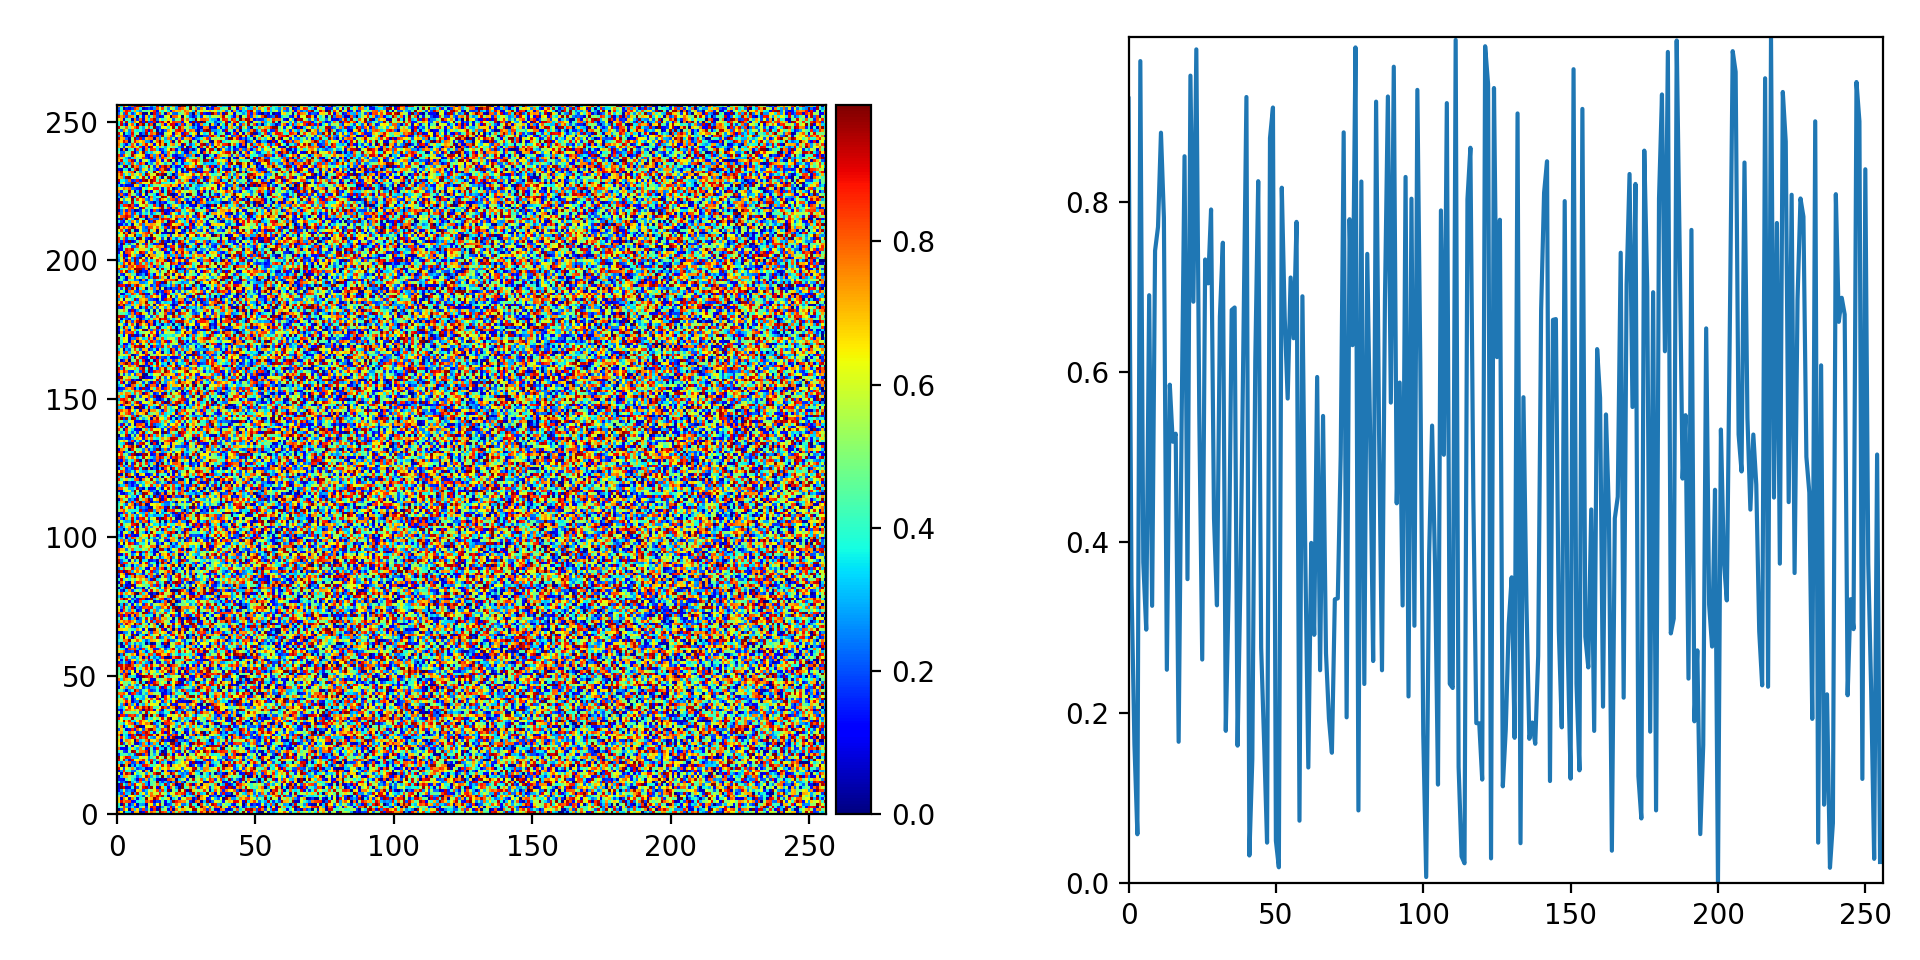

In [4]:
plot = make_plot()

In [5]:
plot_interact(plot)